# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings

warnings.filterwarnings("ignore")

In [17]:
# pip install numpy pandas seaborn matplotlib 

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.4
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file
# !pwd
## relocation path
import os

os.chdir("/Users/khanhnh6/Workspace/Master_learning/EDA/")
df = pd.read_parquet('Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')

In [81]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
# os.chdir('Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        cur_df = pd.read_parquet(file_path)
        cur_df["pickup_date"] = cur_df.tpep_pickup_datetime.dt.date
        cur_df["pickup_hour"] = cur_df.tpep_pickup_datetime.dt.hour
        lst_dt_hr = cur_df[["pickup_date","pickup_hour"]].groupby(cur_df.pickup_date, group_keys=False)["pickup_hour"].apply(set).to_dict()

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for dt in lst_dt_hr.keys():
            # Iterate through each hour of the selected date
            for hr in lst_dt_hr[dt]:
                hour_data = cur_df[(cur_df.pickup_date == dt) & (cur_df.pickup_hour == hr)]
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac = 0.05, random_state = 42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [36]:
# Store the df in csv/parquet
df.to_parquet('sample_trip_records_2023')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [6]:
# Load the new data file
import os

# Select the folder having data files
os.chdir('/Users/khanhnh6/Workspace/Master_learning/EDA/Datasets and Dictionary/trip_records')
df = pd.read_parquet("sample_trip_records_2023")

In [7]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3791            2  2023-11-30 23:58:12   2023-12-01 00:06:58              1.0   
1871            2  2023-11-30 23:58:35   2023-12-01 00:06:32              1.0   
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3791              1.31         1.0                  N           163   
1871              1.22         1.0                  N           161   
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
3791              162             1  ...      0.5        3.00           0.0   
1871              229             1  ...      0.5        1.43           0.0   
1788               50             1  ...      0.5        5.66           0.0   
3196699            61             0  ...      0.5        3.00           0.0   
1408              161             1  ...      0.5        3.14           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
3791                       1.0         18.00                   2.5   
1871                       1.0         15.73                   2.5   
1788                       1.0         33.96                   2.5   
3196699                    1.0         29.43                   NaN   
1408                       1.0         18.84                   2.5   

         Airport_fee  pickup_date  pickup_hour airport_fee  
3791             0.0   2023-11-30           23         NaN  
1871             0.0   2023-11-30           23         NaN  
1788             0.0   2023-12-01            0         NaN  
3196699          NaN   2023-12-01            0         NaN  
1408             0.0   2023-12-01            0         NaN  

[5 rows x 22 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 3791 to 3202916
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [9]:
# Fix the index and drop any columns that are not needed
df = df.reset_index()
df.drop(["store_and_fwd_flag", "mta_tax", "tolls_amount"], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   index                  int64         
 1   VendorID               int64         
 2   tpep_pickup_datetime   datetime64[ns]
 3   tpep_dropoff_datetime  datetime64[ns]
 4   passenger_count        float64       
 5   trip_distance          float64       
 6   RatecodeID             float64       
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  tip_amount             float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
 15  congestion_surcharge   float64       
 16  Airport_fee            float64       
 17  pickup_date            object        
 18  pickup_hour           

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [10]:
# Combine the two airport fee columns
# check null rate of 2 fields, prioritize the field with less nulls to get the value first
# df[["airport_fee", "Airport_fee"]].isnull().sum()
df["airport_fee"] = np.where(df["Airport_fee"].isnull(), df["airport_fee"], df["Airport_fee"])
df.drop("Airport_fee", axis=1,inplace=True)
df["airport_fee"].isnull().sum()

64874

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [11]:
# check where values of fare amount are negative
df[df["fare_amount"] < 0]

Empty DataFrame
Columns: [index, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, tip_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [12]:
# Analyse RatecodeID for the negative fare amounts
df[df["fare_amount"] < 0]["RatecodeID"]


Series([], Name: RatecodeID, dtype: float64)

In [13]:
# Find which columns have negative values
neg_values_cols = []
for col in df.columns:
    if df[col].dtype in ["float64", "int64", "int32"]:
        if df[col].min() < 0:
            neg_values_cols.append(col)
    else:
        continue
print(neg_values_cols)


['extra', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [14]:
# fix these negative values
for col in neg_values_cols:
    df = df.drop(df[df[col] < 0].index)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [15]:
# Find the proportion of missing values in each column
df.isnull().mean()

index                    0.00000
VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          0.03421
trip_distance            0.00000
RatecodeID               0.03421
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
tip_amount               0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.03421
pickup_date              0.00000
pickup_hour              0.00000
airport_fee              0.03421
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [16]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df = df.drop(df[df["passenger_count"].isnull()].index)

Did you find zeroes in passenger_count? Handle these.

In [17]:
df.passenger_count.value_counts(normalize=True)
df = df.drop(df[df["passenger_count"] == 0].index)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [18]:
# Fix missing values in 'RatecodeID'
df["RatecodeID"].isnull().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [18]:
# handle null values in congestion_surcharge
df["RatecodeID"].isnull().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [259]:
# Handle any remaining missing values
df.isnull().sum()

index                    0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
tip_amount               0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [19]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe().transpose()

count                           mean  \
index                  1801766.0                 1551193.416204   
VendorID               1801766.0                       1.748375   
tpep_pickup_datetime     1801766  2023-07-02 00:56:43.446414336   
tpep_dropoff_datetime    1801766  2023-07-02 01:14:08.085086720   
passenger_count        1801766.0                       1.391765   
trip_distance          1801766.0                       3.563801   
RatecodeID             1801766.0                       1.642183   
PULocationID           1801766.0                     165.427569   
DOLocationID           1801766.0                     164.310876   
payment_type           1801766.0                       1.204096   
fare_amount            1801766.0                      19.868442   
extra                  1801766.0                       1.611242   
tip_amount             1801766.0                       3.582726   
improvement_surcharge  1801766.0                        0.99932   
total_amount           1801766.0                      29.007475   
congestion_surcharge   1801766.0                       2.307535   
pickup_hour            1801766.0                      14.299542   
airport_fee            1801766.0                       0.143754   

                                       min                            25%  \
index                                  2.0                       771306.5   
VendorID                               1.0                            1.0   
tpep_pickup_datetime   2022-12-31 23:51:30            2023-04-01 21:54:58   
tpep_dropoff_datetime  2022-12-31 23:56:06  2023-04-01 22:14:16.750000128   
passenger_count                        1.0                            1.0   
trip_distance                          0.0                           1.06   
RatecodeID                             1.0                            1.0   
PULocationID                           1.0                          132.0   
DOLocationID                           1.0                          114.0   
payment_type                           1.0                            1.0   
fare_amount                            0.0                            9.3   
extra                                  0.0                            0.0   
tip_amount                             0.0                            1.0   
improvement_surcharge                  0.0                            1.0   
total_amount                           0.0                          15.96   
congestion_surcharge                   0.0                            2.5   
pickup_hour                            0.0                           11.0   
airport_fee                            0.0                            0.0   

                                       50%                         75%  \
index                            1541689.0                  2312175.75   
VendorID                               2.0                         2.0   
tpep_pickup_datetime   2023-06-26 13:15:25  2023-10-05 22:28:29.500000   
tpep_dropoff_datetime  2023-06-26 13:35:02  2023-10-05 22:44:12.500000   
passenger_count                        1.0                         1.0   
trip_distance                         1.79                        3.39   
RatecodeID                             1.0                         1.0   
PULocationID                         162.0                       234.0   
DOLocationID                         162.0                       234.0   
payment_type                           1.0                         1.0   
fare_amount                           13.5                        21.9   
extra                                  1.0                         2.5   
tip_amount                            2.86                        4.45   
improvement_surcharge                  1.0                         1.0   
total_amount                          21.0                       30.72   
congestion_surcharge                   2.5                         2.5   
pickup_hour                    

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [20]:
# remove passenger_count > 6
df = df.drop(df[df["passenger_count"] > 6].index)

In [23]:
df_backup = df

In [22]:
df = df_backup

In [175]:
# Continue with outlier handling

In [24]:
# calculate cost_per_mile
df["cost_per_mile"] = df.fare_amount/df.trip_distance
df.cost_per_mile.quantile([0.001, 0.25, 0.75, 0.95, 0.97, 1])

0.001     2.592593
0.250     5.669643
0.750     9.148148
0.950    14.673913
0.970    18.333333
1.000          NaN
Name: cost_per_mile, dtype: float64

In [25]:
df = df.drop(df[(df["cost_per_mile"] < 2.6) | (df["cost_per_mile"] > 16)].index)

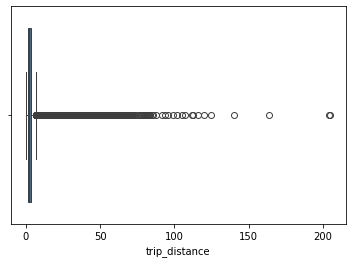

0.001      0.29
0.250      1.11
0.750      3.50
0.950     15.85
0.990     20.22
1.000    204.86
Name: trip_distance, dtype: float64

In [23]:
# Univariate outliers: trip_distance
sns.boxplot(df.trip_distance, orient='h')
plt.show()
df.trip_distance.quantile([0.001, 0.25, 0.75, 0.95, 0.99, 1])

In [26]:
df = df.drop(df[df["trip_distance"] > 90].index)

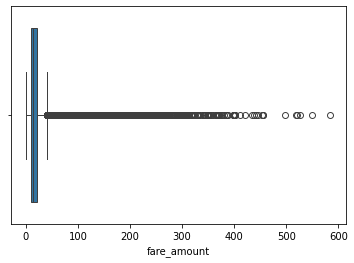

0.001      3.7
0.250      9.3
0.750     21.9
0.950     70.0
0.990     74.4
1.000    584.7
Name: fare_amount, dtype: float64

In [24]:
# Univariate outliers: fare_amount
sns.boxplot(df.fare_amount, orient='h')
plt.show()
df.fare_amount.quantile([0.001, 0.25, 0.75, 0.95, 0.99, 1])

In [27]:
df = df.drop(df[df["fare_amount"] > 300].index)

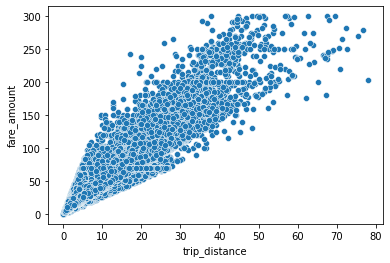

In [21]:
# Multivariate outliers: trip_distance and fare_amount
sns.scatterplot(df, x="trip_distance", y="fare_amount")
plt.show()

In [28]:
# delete trip_distance < 20 but fare_amount > 200
df = df.drop(df[(df["trip_distance"] < 20) & (df["fare_amount"] > 200)].index)
# delete trip_distance > 75 but fare_amount < 220
df = df.drop(df[(df["trip_distance"] > 75) & (df["fare_amount"] < 220)].index)

In [27]:
# Univariate outliers: payment_type
df.payment_type.value_counts(normalize=True)

payment_type
1    0.822737
2    0.168301
4    0.006038
3    0.002924
Name: proportion, dtype: float64

In [29]:
# delete payment_method is not cash or credit card
df = df.drop(df[(df["payment_type"]== 3) | (df["payment_type"]== 4)].index)

In [30]:
## Remove invalid values: tip_amount
# Calculate tip percentage (tip_percent) by tip_amount and total_amount
df["tip_percent"] = df["tip_amount"]/df["total_amount"]*100
# delete tip_percent > 50%
df = df.drop(df[df["tip_percent"] > 50].index)

In [31]:
# Remove invalid values: trip_duration = tpep_dropoff_datetime - tpep_pickup_datetime
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]) / np.timedelta64(1, 'm')
# # drop duration < 0
df = df.drop(df[df["trip_duration"] < 0].index)

In [34]:
df["trip_duration"].quantile([0.5, 0.75, 0.95, 0.99, 0.995, 0.999, 1])

0.500      12.716667
0.750      20.666667
0.950      43.183333
0.990      67.600000
0.995      77.733333
0.999     133.082317
1.000    5329.433333
Name: trip_duration, dtype: float64

In [32]:
# delete trip_duration > 150 (2,5 hours)
df = df.drop(df[df["trip_duration"] > 150].index)

In [33]:
# trip_distance and fare_amount are 0 but pickup and dropoff zones are different
df = df.drop(df[(df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"])].index)
# trip_duration = 0 but pickup and dropoff zones are different
df = df.drop(df[(df["PULocationID"] != df["DOLocationID"]) & (df["trip_duration"] == 0)].index)
# remove if the trip record has not tpep_pickup_datetime and tpep_dropoff_datetime are in 2023
df = df.drop(df[(df.tpep_pickup_datetime.dt.year != 2023) & (df.tpep_dropoff_datetime.dt.year !=2023)].index)

In [34]:
# Do any columns need standardising?
df.trip_duration = df.trip_duration.round(2)
df.tip_percent = df.tip_percent.round(2)
df.cost_per_mile = df.cost_per_mile.round(2)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [35]:
df.columns.tolist()

['index',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'airport_fee',
 'cost_per_mile',
 'tip_percent',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Categorical
* `trip_distance`: Categorical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Categorical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

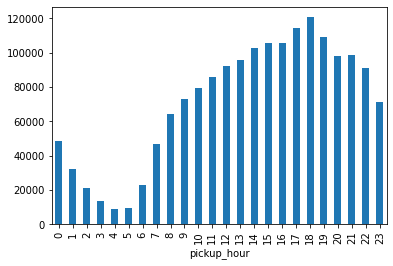

In [36]:
# Find and show the hourly trends in taxi pickups
df.pickup_hour.value_counts().sort_index().plot.bar()
plt.show()

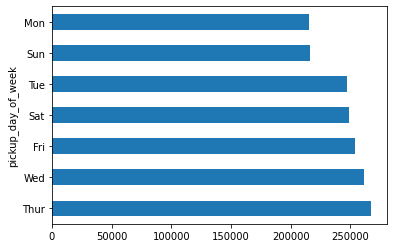

In [36]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.day_of_week
map_name_day = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thur", 4: "Fri", 5: "Sat", 6: "Sun"}
df.pickup_day_of_week.sort_index().map(map_name_day).value_counts().plot.barh()
plt.show()

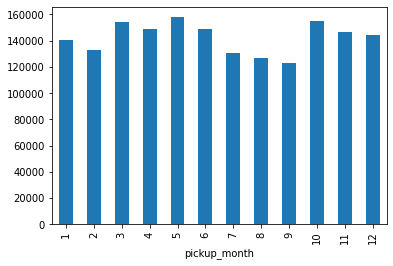

In [37]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

df.pickup_month.value_counts().sort_index().plot.bar()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [38]:
# Analyse the above parameters
df[["fare_amount", "tip_amount", "total_amount", "trip_distance"]].agg(["min", "max", "mean"])

fare_amount  tip_amount  total_amount  trip_distance
min      0.000000    0.000000      0.000000       0.000000
max    300.000000  103.100000    421.880000      76.730000
mean    19.725547    3.638632     28.964064       3.558504

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [39]:
# Create a df with non zero entries for the selected parameters.
df_1 = df.drop(df[((df["trip_distance"] == 0) & (df["PULocationID"] == df["DOLocationID"])) | (df["fare_amount"] == 0) | (df["total_amount"] == 0) | (df["tip_amount"] == 0)].index)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

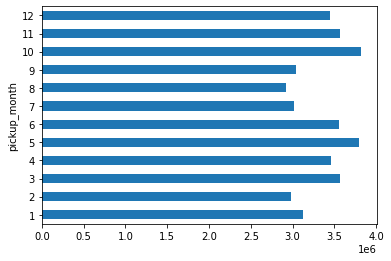

In [40]:
# Group data by month and analyse monthly revenue
df_1.groupby("pickup_month")["total_amount"].sum().plot.barh()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

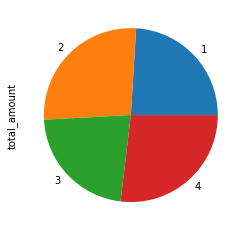

In [43]:
# Calculate proportion of each quarter
df_1['pickup_quarter'] = df_1['tpep_pickup_datetime'].dt.quarter

df_1.groupby("pickup_quarter")["total_amount"].sum().plot.pie()
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

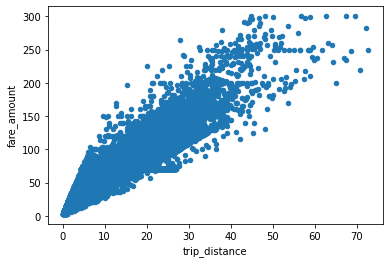

trip_distance  fare_amount
trip_distance       1.000000     0.965324
fare_amount         0.965324     1.000000

In [44]:
# Show how trip fare is affected by distance
df_1[df_1["trip_distance"] > 0].plot.scatter(x="trip_distance", y="fare_amount")
plt.show()
df[["trip_distance","fare_amount"]].corr()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [36]:
# Show relationship between fare and trip duration
df[["trip_duration","fare_amount"]].corr()


trip_duration  fare_amount
trip_duration       1.000000     0.868061
fare_amount         0.868061     1.000000

In [37]:
# Show relationship between fare and number of passengers
df[["fare_amount","passenger_count"]].corr()


fare_amount  passenger_count
fare_amount         1.000000         0.041408
passenger_count     0.041408         1.000000

In [38]:
# Show relationship between tip and trip distance
df[["tip_amount","trip_distance"]].corr()


tip_amount  trip_distance
tip_amount       1.000000       0.618106
trip_distance    0.618106       1.000000

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

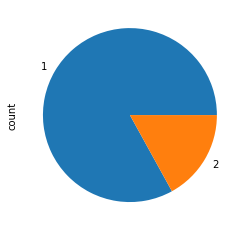

In [39]:
# Analyse the distribution of different payment types (payment_type).
df.payment_type.value_counts().plot.pie()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [67]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [45]:
import geopandas as gpd

# !pwd
os.chdir('/Users/khanhnh6/Workspace/Master_learning/EDA/Datasets and Dictionary/taxi_zones')

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

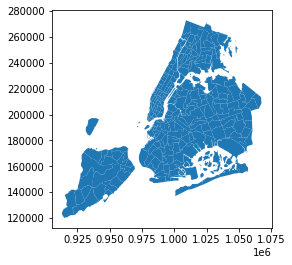

In [46]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [47]:
# Merge zones and trip records using locationID and PULocationID
df = df.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709468 entries, 0 to 1709467
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   index                  int64         
 1   VendorID               int64         
 2   tpep_pickup_datetime   datetime64[ns]
 3   tpep_dropoff_datetime  datetime64[ns]
 4   passenger_count        float64       
 5   trip_distance          float64       
 6   RatecodeID             float64       
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  tip_amount             float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
 15  congestion_surcharge   float64       
 16  pickup_date            object        
 17  pickup_hour            int32         
 18  airport_fee           

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [48]:
# Group data by location and calculate the number of trips
trip_count_df = df.groupby(df["LocationID"])["LocationID"].count().reset_index(name='Count')
trip_count_df.head()

LocationID  Count
0         1.0     14
1         2.0      2
2         3.0     26
3         4.0   1728
4         5.0      9

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [49]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trip_count_df, how='left', on='LocationID')
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
 7   Count       248 non-null    float64 
dtypes: float64(3), geometry(1), int32(2), object(2)
memory usage: 14.5+ KB


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

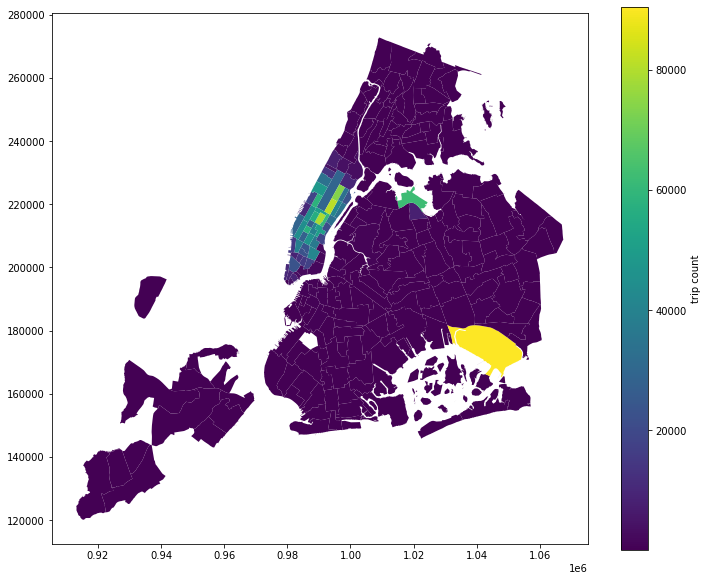

In [50]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column = 'Count',
    ax = ax,
    legend = True,
    legend_kwds = {'label': "trip count", 'orientation': "vertical"}
)
plt.show()


In [51]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values('Count', ascending=False, inplace=True)
zones.head()


OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
137       138    0.107467    0.000537      LaGuardia Airport         138   

       borough                                           geometry    Count  
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...  90494.0  
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...  81130.0  
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...  78966.0  
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...  73693.0  
137     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...  62154.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [79]:
# Find routes which have the slowest speeds at different times of the day
road_df = df[['PULocationID', 'DOLocationID', 'pickup_hour', 'trip_distance', 'trip_duration']]
# calculate avg_trip_distance by PULocationID and DOLocationID
r1 = road_df.groupby(['PULocationID', 'DOLocationID'], as_index=False)["trip_distance"].median()
r2 = road_df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'], as_index=False)["trip_duration"].agg(mean_duration=('mean'), count_trip=('count'))
r1 = r1.merge(r2, how="inner", on=["PULocationID", "DOLocationID"])
r1["speed"] = r1["trip_distance"]/r1["mean_duration"]
r1[(r1["trip_distance"] > 0) & (r1["count_trip"] > 100)].sort_values(
    by=["speed", "count_trip"], ascending=[True, False]
)[["PULocationID", "DOLocationID", "pickup_hour", "mean_duration", "trip_distance", "speed", "count_trip"]][:15]

PULocationID  DOLocationID  pickup_hour  mean_duration  trip_distance  \
74565           162           230           13      14.033663           0.94   
72272           161           230           18      10.871706           0.75   
72271           161           230           17      10.671120           0.75   
71770           161           161           17       8.503309           0.60   
71766           161           161           13       8.440268           0.60   
71208           161           100           17      13.650459           1.00   
71764           161           161           11       8.149615           0.60   
86042           186           230           13      14.928453           1.10   
74048           162           161           12       9.851333           0.73   
71765           161           161           12       8.078609           0.60   
85575           186           170           11      14.115820           1.05   
71767           161           161           14       8.047652           0.60   
73093           162            48           17      17.436078           1.30   
74570           162           230           18      12.592741           0.94   
74076           162           162           17       8.274144           0.62   

          speed  count_trip  
74565  0.066982         101  
72272  0.068986         170  
72271  0.070283         125  
71770  0.070561         136  
71766  0.071088         112  
71208  0.073258         109  
71764  0.073623         104  
86042  0.073685         181  
74048  0.074102         120  
71765  0.074270         115  
85575  0.074385         122  
71767  0.074556         132  
73093  0.074558         102  
74570  0.074646         135  
74076  0.074932         111

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

<Figure size 432x432 with 0 Axes>

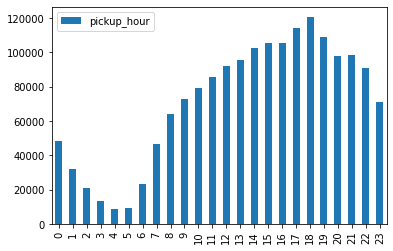

In [58]:
# Visualise the number of trips per hour and find the busiest hour
plt.figure(figsize=(6,6))
df.groupby(df["pickup_hour"], as_index=False)["pickup_hour"].count().plot.bar()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [59]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =(df.groupby(df["pickup_hour"])["pickup_hour"].count().reset_index(name="count"))
sample_fraction["count"] = sample_fraction["count"]/0.05
sample_fraction.head(12)

pickup_hour      count
0             0   970380.0
1             1   646340.0
2             2   422440.0
3             3   273940.0
4             4   172220.0
5             5   185580.0
6             6   461420.0
7             7   930140.0
8             8  1287760.0
9             9  1463200.0
10           10  1588360.0
11           11  1711840.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<Figure size 432x432 with 0 Axes>

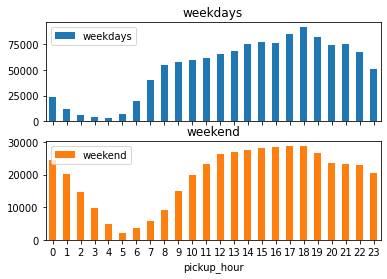

In [80]:
# Compare traffic trends for the week days and weekends
plt.figure(figsize=(6,6))
df["type_of_day"] = np.where(df["pickup_day_of_week"].isin([0,1,2,3,4]), "weekdays", "weekend")
weekday_traffic = df.groupby(["type_of_day", "pickup_hour"])["type_of_day"].count().reset_index(name="count")
axes = weekday_traffic.pivot(index="pickup_hour", columns="type_of_day", values="count").plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2) 
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

<Figure size 432x1440 with 0 Axes>

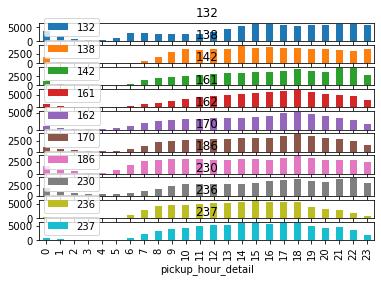

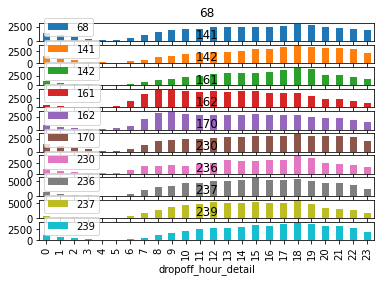

In [81]:
# Find top 10 pickup and dropoff zones
df["dropoff_hour"] = df["tpep_dropoff_datetime"].dt.hour
pickup_zone_count = df.groupby(["PULocationID", "pickup_hour"])["PULocationID"].count().reset_index(name="count")
pickup_zone_hourly = pickup_zone_count.groupby("PULocationID", as_index=False).agg({"count": "sum", "pickup_hour":"count"})
pickup_zone_hourly["avg_hourly_pickup"] = pickup_zone_hourly["count"]/pickup_zone_hourly["pickup_hour"]
top_10_pickup = pickup_zone_hourly.sort_values(by="avg_hourly_pickup", ascending=False)[:10]
pickup_zone_count.merge(top_10_pickup, on="PULocationID", how="inner")
dropoff_zone_count = df.groupby(["DOLocationID", "dropoff_hour"])["DOLocationID"].count().reset_index(name="count")
dropoff_zone_hourly = dropoff_zone_count.groupby("DOLocationID", as_index=False).agg({"count": "sum", "dropoff_hour":"count"})
dropoff_zone_hourly["avg_hourly_dropoff"] = dropoff_zone_hourly["count"]/dropoff_zone_hourly["dropoff_hour"]
top_10_dropoff = dropoff_zone_hourly.sort_values(by="avg_hourly_dropoff", ascending=False)[:10]
plt.figure(figsize=(6,20))
ax1 = pickup_zone_count.merge(
    top_10_pickup, on="PULocationID", how="inner", suffixes=('_detail', '_total')
)[["PULocationID", "pickup_hour_detail", "count_detail"]].pivot(index="pickup_hour_detail", columns="PULocationID", values="count_detail").plot.bar(subplots=True)
axes[1].legend(loc=5)
plt.show()
ax2 = dropoff_zone_count.merge(
    top_10_dropoff, on="DOLocationID", how="inner", suffixes=('_detail', '_total')
)[["DOLocationID", "dropoff_hour_detail", "count_detail"]].pivot(index="dropoff_hour_detail", columns="DOLocationID", values="count_detail").plot.bar(subplots=True)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [82]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
zone_count = df.groupby(["PULocationID", "DOLocationID"])["PULocationID"].count().reset_index(name="count")
pickup_zone_count = zone_count.groupby(["PULocationID"])["count"].sum().reset_index(name="count")
dropoff_zone_count = zone_count.groupby(["DOLocationID"])["count"].sum().reset_index(name="count")
zone_ratio = pd.merge(pickup_zone_count, dropoff_zone_count, left_on='PULocationID', right_on='DOLocationID')
zone_ratio["zone_id"] = zone_ratio["PULocationID"]
zone_ratio["ratio"] = zone_ratio["count_x"]/zone_ratio["count_y"]
top_10_zone = zone_ratio[["zone_id", "ratio"]].sort_values(by="ratio",ascending=False)[:10]
bottom_10_zone = zone_ratio[["zone_id", "ratio"]].sort_values(by="ratio",ascending=True)[:10]
print("top 10 zones")
display(top_10_zone)
print("bottom 10 zones")
display(bottom_10_zone)

top 10 zones


zone_id      ratio
67        70  10.418883
122      132   5.203197
128      138   2.967061
173      186   1.561244
104      114   1.383493
40        43   1.375997
232      249   1.329437
151      162   1.260413
96       100   1.246218
150      161   1.232034

bottom 10 zones


zone_id     ratio
0          1  0.002801
240      257  0.021739
248      265  0.023754
118      128  0.030928
234      251  0.032258
184      198  0.033262
93        96  0.038462
102      112  0.041993
34        37  0.044820
166      178  0.045161

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [83]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_pickup_zone_count = df[df["pickup_hour"].isin([23,0,1,2,3,4])].groupby(["PULocationID"])["PULocationID"].count().reset_index(name="count")
night_dropoff_zone_count = df[df["dropoff_hour"].isin([23,0,1,2,3,4])].groupby(["DOLocationID"])["DOLocationID"].count().reset_index(name="count")
night_zone_count = night_pickup_zone_count.merge(night_dropoff_zone_count, left_on='PULocationID', right_on='DOLocationID', suffixes=["_pickup", "_dropoff"])
night_zone_count["count_total"] = night_zone_count["count_pickup"]+night_zone_count["count_dropoff"]
night_zone_count.sort_values(by="count_total",ascending=False)[["PULocationID", "count_pickup", "count_dropoff", "count_total"]][:10]

PULocationID  count_pickup  count_dropoff  count_total
65             79         14626           8358        22984
200           249         11868           4990        16858
38             48          9308           6799        16107
116           148          9104           4363        13467
102           132         12557            620        13177
183           230          7308           4410        11718
55             68          5508           5643        11151
84            107          5166           5793        10959
88            114          8371           2536        10907
136           170          3713           6217         9930

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [84]:
# Filter for night hours (11 PM to 5 AM)
df["time_desc"] = np.where(df["pickup_hour"].isin([23,1,2,3,4]), "nighttime", "daytime")
df.groupby("time_desc")["total_amount"].sum().reset_index(name="total_amount")

time_desc  total_amount
0    daytime   45296168.87
1  nighttime    4218916.95

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [85]:
# Analyse the fare per mile per passenger for different passenger counts
price_df = df.groupby("passenger_count", as_index=False)["cost_per_mile"].mean()
price_df["avg_fare_per_mile_per_passenger"] = price_df["cost_per_mile"]/price_df["passenger_count"]
price_df

passenger_count  cost_per_mile  avg_fare_per_mile_per_passenger
0              1.0       7.471267                         7.471267
1              2.0       7.279582                         3.639791
2              3.0       7.387545                         2.462515
3              4.0       7.326834                         1.831708
4              5.0       7.381508                         1.476302
5              6.0       7.465444                         1.244241

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

<Axes: xlabel='pickup_hour'>

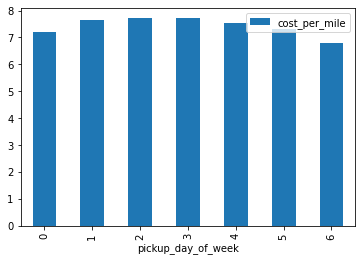

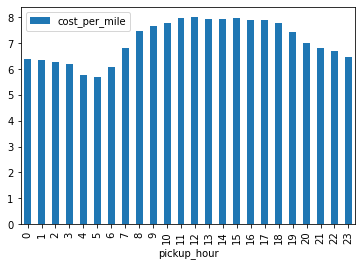

In [88]:
# Compare the average fare per mile for different days and for different times of the day
df.groupby("pickup_day_of_week", as_index=False)["cost_per_mile"].mean().plot.bar(
    x="pickup_day_of_week", y ="cost_per_mile")
df.groupby("pickup_hour", as_index=False)["cost_per_mile"].mean().plot.bar(
    x="pickup_hour", y ="cost_per_mile")

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [89]:
# Compare fare per mile for different vendors
df.groupby("VendorID", as_index=False)["cost_per_mile"].mean()

VendorID  cost_per_mile
0         1       7.460536
1         2       7.425462

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


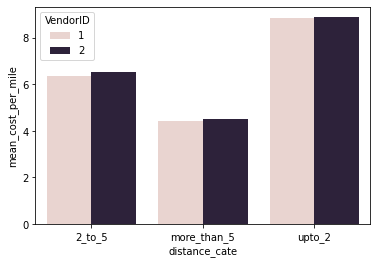

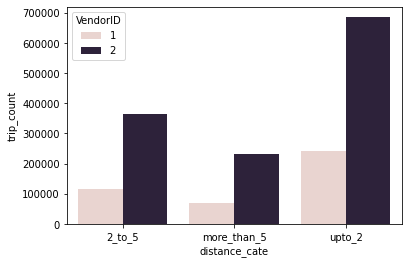

In [97]:
# Defining distance cate
df["distance_cate"] = np.where(
    df["trip_distance"] <= 2, "upto_2", np.where(
        df["trip_distance"] <= 5, "2_to_5", "more_than_5"
    )
)
vendor_distance_cate_df = df.groupby(["VendorID", "distance_cate"], as_index=False)["cost_per_mile"].agg(
    mean_cost_per_mile="mean", trip_count="count")
vendor_distance_cate_df
barplot = sns.barplot(vendor_distance_cate_df, x='distance_cate', y='mean_cost_per_mile', hue='VendorID')
plt.show()
barplot = sns.barplot(vendor_distance_cate_df, x='distance_cate', y='trip_count', hue='VendorID')
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

<Axes: xlabel='distance_cate', ylabel='time_desc-passenger_count'>

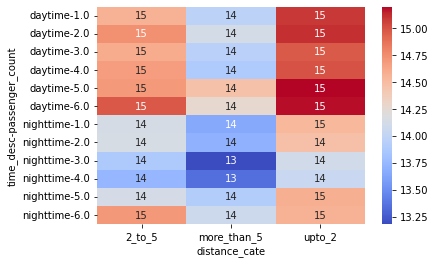

In [325]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# filter payment type cash, since tips are not recorded in cash payment
tip = df[(df['payment_type'] != 2) & (~df["tip_percent"].isnull())]
# tip.info()
tip_percent = tip.groupby(['distance_cate', 'passenger_count', 'time_desc'], as_index=False)['tip_percent'].mean()
tip_percent_heatmap = pd.pivot_table(tip_percent, values='tip_percent', index=['time_desc','passenger_count'], columns='distance_cate')
sns.heatmap(tip_percent_heatmap, annot=True, cmap='coolwarm')

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

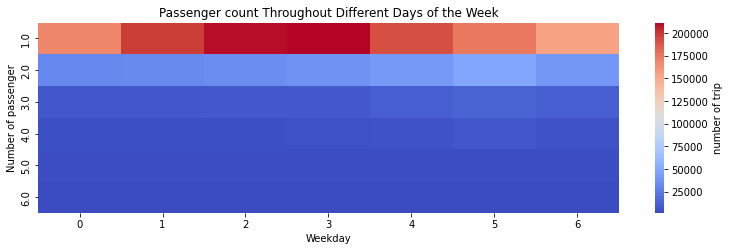

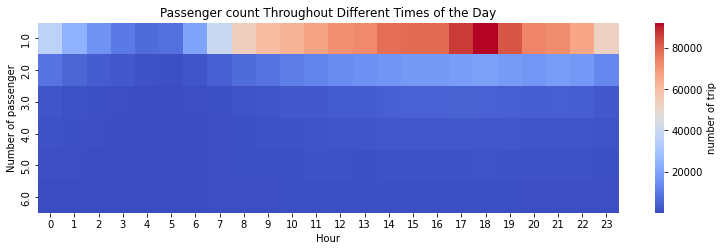

In [363]:
# See how passenger count varies across hours and days
passenger_df_w = df.groupby(["passenger_count", "pickup_day_of_week"])["passenger_count"].count().reset_index(name="count")
passenger_heatmap_w = pd.pivot_table(passenger_df_w, values='count', index='passenger_count', columns='pickup_day_of_week')
fig, ax = plt.subplots(figsize=(13, 3.5))
sns.heatmap(passenger_heatmap_w, cbar_kws={'label': 'number of trip'}, ax=ax, cmap='coolwarm')
ax.set_ylabel('Number of passenger')
ax.set_xlabel('Weekday')
ax.set_title('Passenger count Throughout Different Days of the Week')
plt.show()
passenger_df_h = df.groupby(["passenger_count", "pickup_hour"])["passenger_count"].count().reset_index(name="count")
passenger_heatmap_h = pd.pivot_table(passenger_df_h, values='count', index='passenger_count', columns='pickup_hour')
fig, ax = plt.subplots(figsize=(13, 3.5))
sns.heatmap(passenger_heatmap_h, cbar_kws={'label': 'number of trip'}, ax=ax, cmap='coolwarm')
ax.set_ylabel('Number of passenger')
ax.set_xlabel('Hour')
ax.set_title('Passenger count Throughout Different Times of the Day')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [515]:
# How does passenger count vary across zones
passenger_location_df_PU = df.groupby(["passenger_count", "zone","borough"])["passenger_count"].count().reset_index(name="count")
passenger_location_df_PU["rn_top"] = passenger_location_df_PU.groupby("passenger_count", as_index=False)["count"].rank(method="first", ascending=False)
passenger_location_df_PU["rn_bottom"] = passenger_location_df_PU.groupby("passenger_count", as_index=True)["count"].rank(method="first", ascending=False)
top_10_PU = passenger_location_df_PU[passenger_location_df_PU["rn_top"] <= 10][["passenger_count", "zone","count"]]
top_10_PU.head()

passenger_count                 zone  count
116              1.0          JFK Airport  60938
126              1.0    LaGuardia Airport  47804
130              1.0  Lincoln Square East  43983
148              1.0       Midtown Center  60164
149              1.0         Midtown East  48606

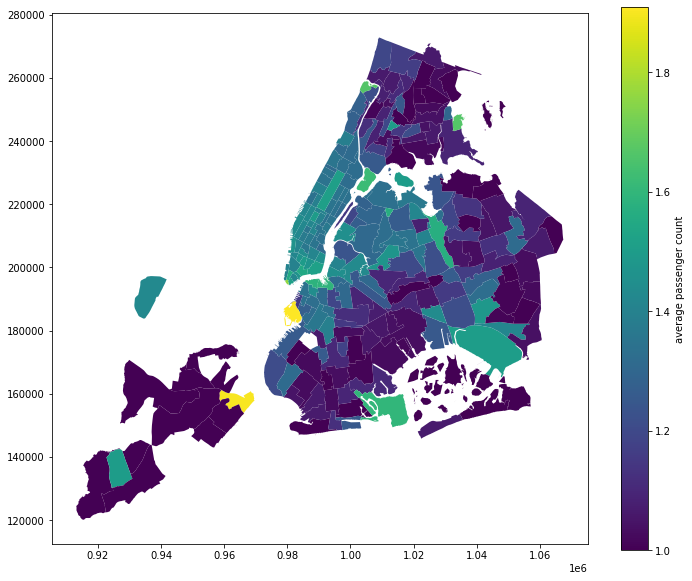

In [469]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
passenger_location_df_PU["total_passenger_count"] = (passenger_location_df_PU["passenger_count"]*passenger_location_df_PU["count"])

zone_PU_avg_passenger = passenger_location_df_PU.groupby(
    passenger_location_df_PU["zone"]
)[["total_passenger_count", "count"]].sum().round(1)
zone_PU_avg_passenger["avg_passenger_count_by_zones"]=zone_PU_avg_passenger["total_passenger_count"]/zone_PU_avg_passenger["count"]

fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
zones.merge(zone_PU_avg_passenger, on="zone").plot(column = 'avg_passenger_count_by_zones',
    ax = ax,
    legend = True,
    legend_kwds = {'label': "average passenger count", 'orientation': "vertical"}
)
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

<Axes: xlabel='pickup_hour'>

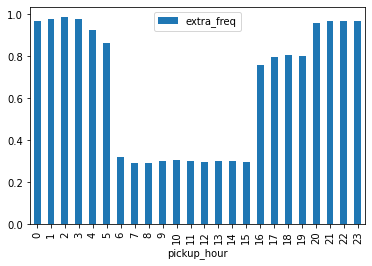

In [512]:
# How often is each surcharge applied?
extra_count_by_hour = df[df["extra"] > 0].groupby(["pickup_hour"], as_index=False)[["extra"]].count()
extra_count_by_hour = df.groupby(["pickup_hour"], as_index=False)[["extra"]].count().merge(extra_count_by_hour, on="pickup_hour")
extra_count_by_hour["extra_freq"] = extra_count_by_hour["extra_y"]/extra_count_by_hour["extra_x"]
extra_count_by_hour[["pickup_hour", "extra_freq"]].plot.bar(x="pickup_hour")

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.